In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
from skimage import io
from sklearn.metrics import classification_report
from skimage import feature

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
data = pd.read_csv(
    'train.csv'
)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Columns: 785 entries, label to pixel783
dtypes: float64(571), int64(214)
memory usage: 24.0 MB


In [5]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df = data.copy()

In [22]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(4010, 785)

# image processing

In [25]:
image = df.iloc[889].values[1:].reshape(28,28)
image.shape

(28, 28)

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


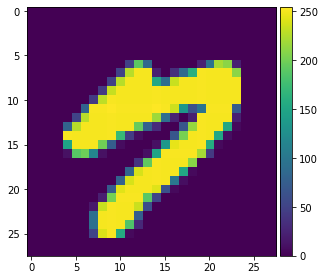

In [26]:
io.imshow(image)

In [27]:
image.max()

255.0

# data split

In [28]:
from sklearn.model_selection import train_test_split

In [37]:
images = df.drop(columns=['label']).values
label = df.label

In [38]:
images = images/255.0
images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
images.max()

1.0

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(
        images, label, test_size=0.3, random_state=33
)

# Feature Extraction / Dimensionality Reduction

In [52]:
transform = lambda image: feature.hog(image.reshape(28,28))

In [56]:
train_vector = np.array(list(map(transform , xtrain)))
test_vector = np.array(list(map(transform , xtest)))

# Model

In [57]:
from sklearn.svm import SVC

In [58]:
digit_recognizer = SVC()

In [60]:
digit_recognizer.fit(train_vector, ytrain)

SVC()

# Evaluation

In [61]:
ypred = digit_recognizer.predict(test_vector)

In [62]:
report = classification_report(
    ytest, ypred
)

In [63]:
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       119
           1       1.00      0.98      0.99       130
           2       0.95      0.93      0.94       133
           3       0.94      0.95      0.95       104
           4       0.94      0.97      0.95       107
           5       0.92      0.94      0.93       108
           6       0.98      0.99      0.98       132
           7       0.95      0.93      0.94       130
           8       0.93      0.94      0.94       123
           9       0.96      0.90      0.93       117

    accuracy                           0.95      1203
   macro avg       0.95      0.95      0.95      1203
weighted avg       0.95      0.95      0.95      1203



In [64]:
81/784

0.10331632653061225

# Hyper-parameter tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
grid = RandomizedSearchCV(
    digit_recognizer,
    param_distributions={
        'C': np.arange(1.0, 100, 2),
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
        'degree': [3, 4, 5, 6, 7],
        'gamma': ['scale', 'auto'],
        'decision_function_shape': ['ovo', 'ovr']
    }, cv=10, scoring='accuracy', n_jobs=-1, verbose=1
)

In [75]:
feature_vector = np.array(list(map(transform, images)))

In [76]:
feature_vector.shape

(4010, 81)

In [77]:
grid.fit(feature_vector, label)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23., 25.,
       27., 29., 31., 33., 35., 37., 39., 41., 43., 45., 47., 49., 51.,
       53., 55., 57., 59., 61., 63., 65., 67., 69., 71., 73., 75., 77.,
       79., 81., 83., 85., 87., 89., 91., 93., 95., 97., 99.]),
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'degree': [3, 4, 5, 6, 7],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   scoring='accuracy', verbose=1)

In [78]:
grid.best_score_

0.9605985037406484

In [80]:
grid.best_params_

{'kernel': 'poly',
 'gamma': 'scale',
 'degree': 7,
 'decision_function_shape': 'ovr',
 'C': 67.0}

In [88]:
grid.best_estimator_

SVC(C=67.0, degree=7, kernel='poly')

# Pipeline

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [91]:
class PreProcessor(BaseEstimator, TransformerMixin):
  def __init__(self):
    pass
  
  def fit(self, X, y=None):
    self.X = X
    self.y = y
    return self
  
  def transform(self, X, y=None):
    transform = lambda image: feature.hog(image.reshape(28,28)/255.0)
    feature_vector = np.array(list(map(transform, self.X)))
    return feature_vector


In [92]:
pipeline = Pipeline([
    ('feature_extractor', PreProcessor()), 
    ('digit_recognizer', SVC(
        C=67.0, 
        degree=7, 
        kernel='poly',
        gamma='scale',
        decision_function_shape='ovr'
        )
    )
])

In [93]:
pipeline.fit(images, label)

Pipeline(steps=[('feature_extractor', PreProcessor()),
                ('digit_recognizer', SVC(C=67.0, degree=7, kernel='poly'))])

In [102]:
ypred = pipeline.predict(images)
report2 = classification_report(
    label, ypred
)

In [103]:
print(report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       447
           2       1.00      1.00      1.00       431
           3       1.00      1.00      1.00       371
           4       1.00      1.00      1.00       389
           5       1.00      1.00      1.00       380
           6       1.00      1.00      1.00       413
           7       1.00      1.00      1.00       409
           8       1.00      1.00      1.00       386
           9       1.00      1.00      1.00       381

    accuracy                           1.00      4010
   macro avg       1.00      1.00      1.00      4010
weighted avg       1.00      1.00      1.00      4010

